In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df = pd.read_csv('salary_data_cleaned')

In [4]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python_yn,R_yn,spark,aws,excel
0,Data Scientist,53-91,"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research,NM,0,48,1,0,0,0,1
1,Healthcare Data Scientist,63-112,What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System,MD,0,37,1,0,0,0,0
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4,FL,1,11,1,0,1,0,1
3,Data Scientist,56-97,*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL,WA,1,56,1,0,0,0,0
4,Data Scientist,86-143,Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions,NY,1,23,1,0,0,0,1


In [5]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel'],
      dtype='object')

In [6]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

## Job title and seniority 

##  Fix state Los Angeles 

##  Job description length 

##  Competitor count

## hourly wage to annual 

#remove new line from job title

In [7]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [12]:
# to get the % pass 'normalize=True' to value_counts()
df['job_simp'].value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
mle                22
manager            22
director           14
Name: job_simp, dtype: int64

In [13]:
df['seniority'] = df['Job Title'].apply(seniority)

In [15]:
df['seniority'].value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [17]:
# we have 'Los Angeles' in the job_state column. deal with it, convert it to 'CA'
df['job_state'].value_counts()

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 WA              21
 NC              21
 NJ              17
 FL              16
 OH              14
 TN              13
 DC              11
 CO              11
 IN              10
 UT              10
 WI              10
 MO               9
 AZ               9
 AL               8
 DE               6
 GA               6
 KY               6
 MI               6
 IA               5
 CT               5
 OR               4
 LA               4
 NE               4
 KS               3
 NM               3
 MN               2
 ID               2
 Los Angeles      1
 RI               1
 SC               1
Name: job_state, dtype: int64

In [43]:
# converting Los Angeles to CA
df['job_state'] = df['job_state'].apply(lambda x : x.strip() if x.strip().lower() != 'los angeles' else 'CA')

In [44]:
df['job_state'].value_counts()

CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
WA     21
NC     21
NJ     17
FL     16
OH     14
TN     13
CO     11
DC     11
IN     10
WI     10
UT     10
AZ      9
MO      9
AL      8
GA      6
DE      6
MI      6
KY      6
IA      5
CT      5
NE      4
OR      4
LA      4
KS      3
NM      3
ID      2
MN      2
SC      1
RI      1
Name: job_state, dtype: int64

In [45]:
# job description length, we do that because the the length of job description may effect the salary
df['desc_len'] = df['Job Description'].apply(lambda x : len(x))
df['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [46]:
#Competitor count
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [47]:
df['num_comp']

0      0
1      0
2      0
3      3
4      3
      ..
737    3
738    3
739    0
740    0
741    0
Name: num_comp, Length: 742, dtype: int64

In [48]:
#hourly wage to annual 

df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [49]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [51]:
# will only give a description of the columns that has numeric values
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python_yn,R_yn,spark,aws,excel,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,47.524259,0.528302,0.002695,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.839080,0.499535,0.051882,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,25.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,60.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,277.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [53]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

### visualization

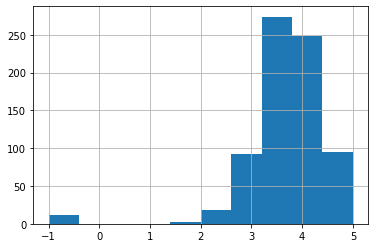

In [54]:
# making histograms

df['Rating'].hist()

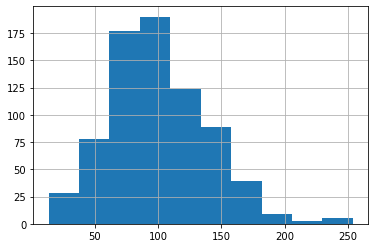

In [55]:
# normal distrubtiutian
df['avg_salary'].hist()

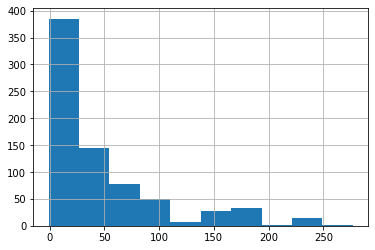

In [56]:
# exponantial distrubitotian, when using it in a model we have to normalaize it
df['age'].hist()

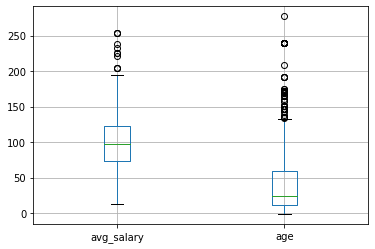

In [60]:
df.boxplot(column = ['avg_salary','age'])

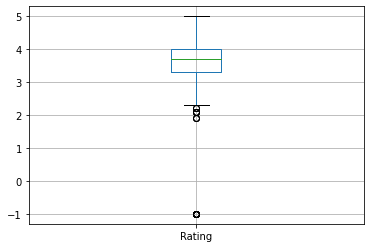

In [62]:
df.boxplot(column=['Rating'])

In [69]:
## correlations between continuous variables
corr = df[['avg_salary','age','Rating','desc_len','num_comp']].corr()
corr

,avg_salary,age,Rating,desc_len,num_comp
avg_salary,1.000000,0.019574,0.013492,0.078808,0.093813
age,0.019574,1.000000,0.023162,0.164188,0.127482
Rating,0.013492,0.023162,1.000000,-0.012281,0.027190
desc_len,0.078808,0.164188,-0.012281,1.000000,0.104620
num_comp,0.093813,0.127482,0.027190,0.104620,1.000000


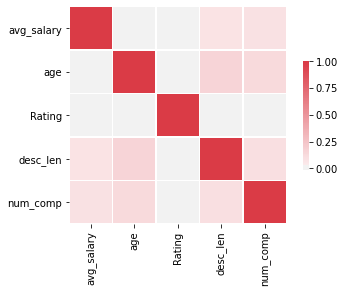

In [73]:
# making a heatmap

cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr,vmax=1, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [74]:
## categorial variables

df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [92]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state','same_state', 'python_yn', 'R_yn',
       'spark', 'aws', 'excel', 'job_simp', 'seniority']]

In [93]:
df_cat.head()

,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,company_txt,job_state,same_state,python_yn,R_yn,spark,aws,excel,job_simp,seniority
0,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),Tecolote Research,NM,0,1,0,0,0,1,data scientist,na
1,"Linthicum, MD","Baltimore, MD",10000+ employees,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),University of Maryland Medical System,MD,0,1,0,0,0,0,data scientist,na
2,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,Company - Private,Security Services,Business Services,$100 to $500 million (USD),KnowBe4,FL,1,1,0,1,0,1,data scientist,na
3,"Richland, WA","Richland, WA",1001 to 5000 employees,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),PNNL,WA,1,1,0,0,0,0,data scientist,na
4,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,Affinity Solutions,NY,1,1,0,0,0,1,data scientist,na


graph for Location: total = 200


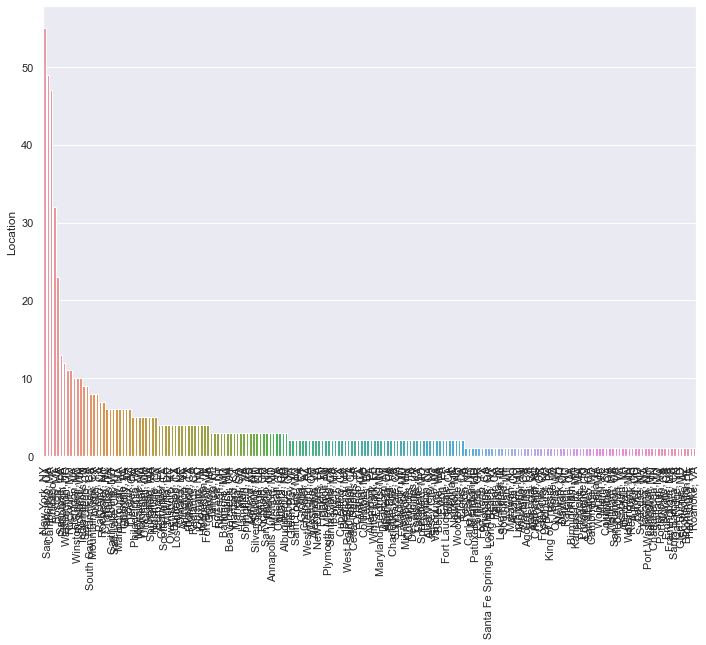

graph for Headquarters: total = 198


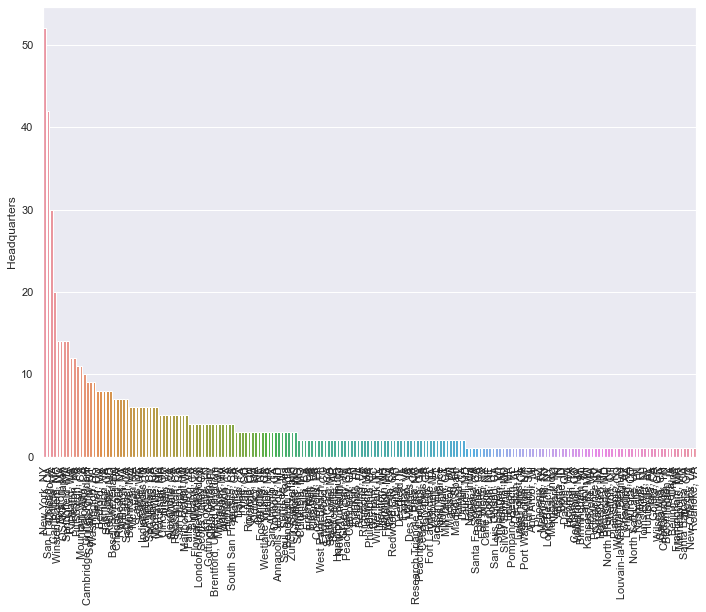

graph for Size: total = 9


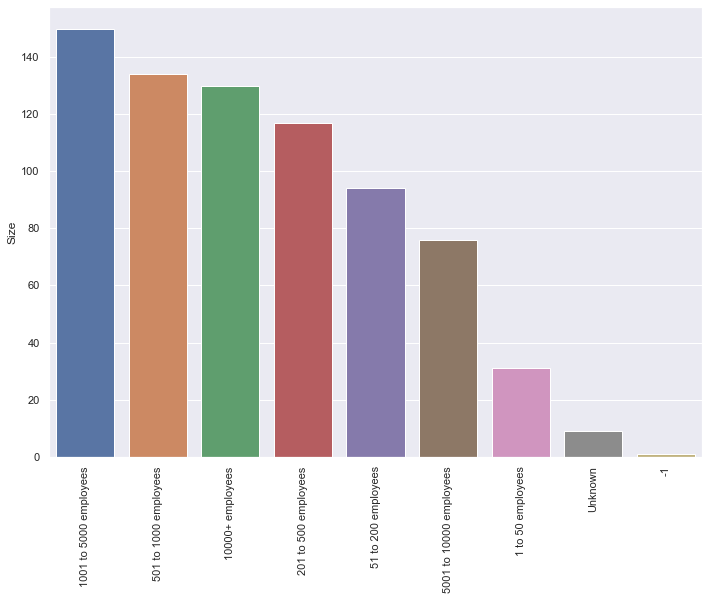

graph for Type of ownership: total = 11


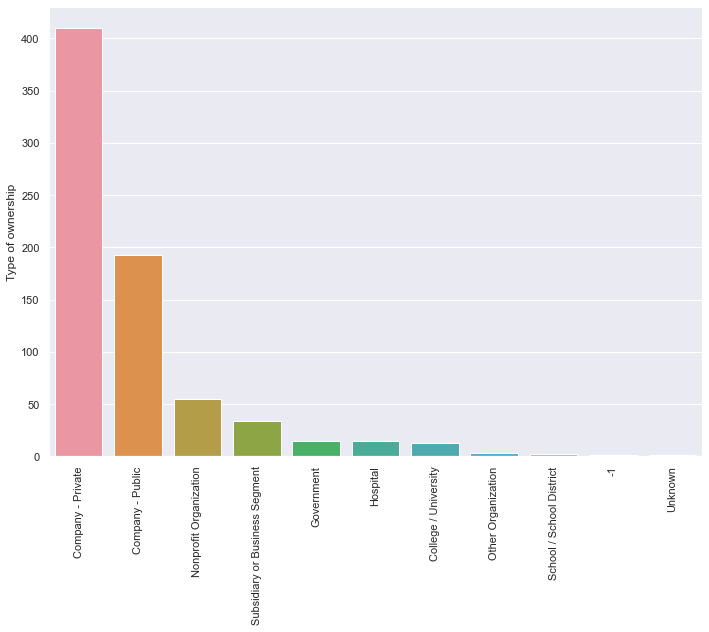

graph for Industry: total = 60


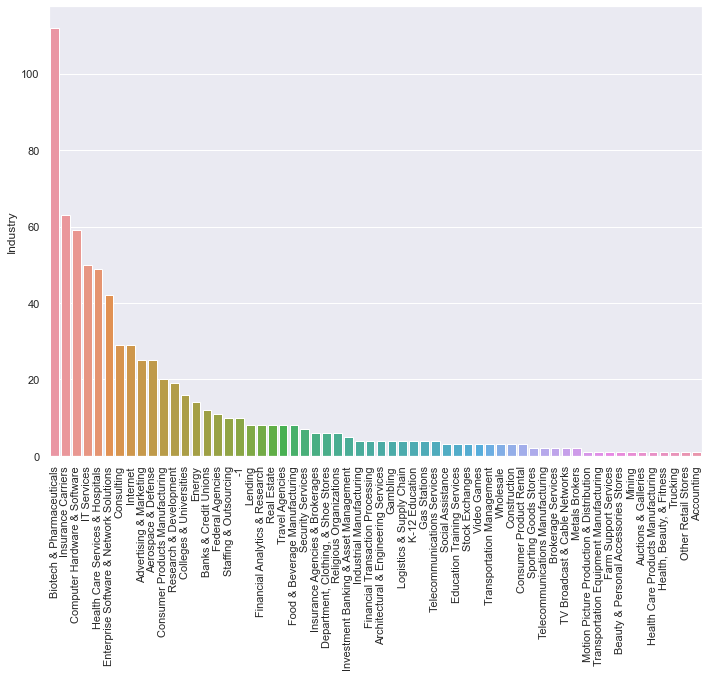

graph for Sector: total = 25


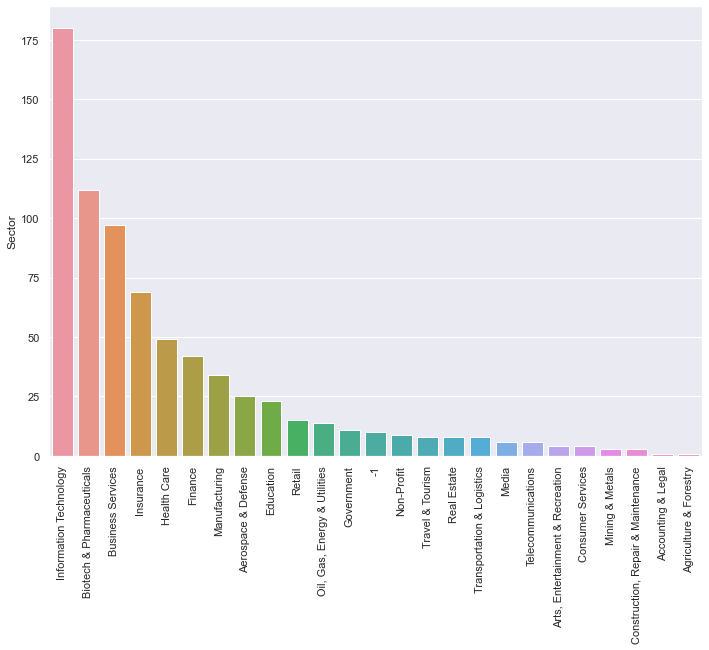

graph for Revenue: total = 14


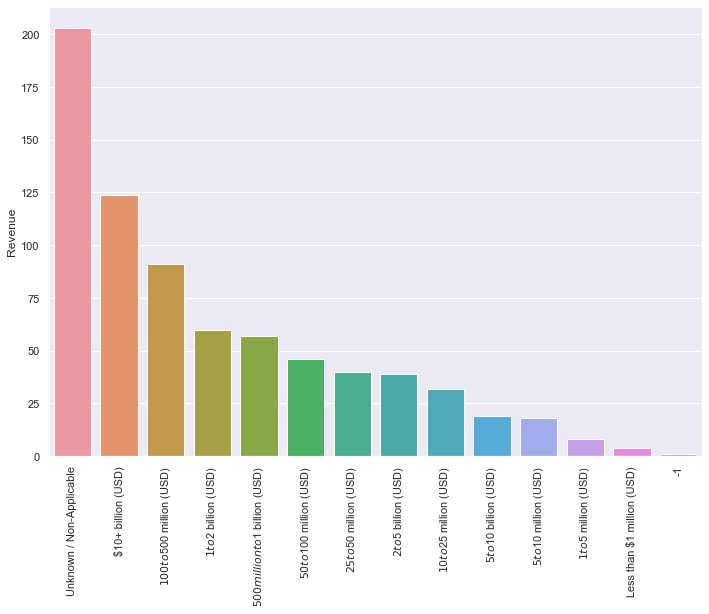

graph for company_txt: total = 343


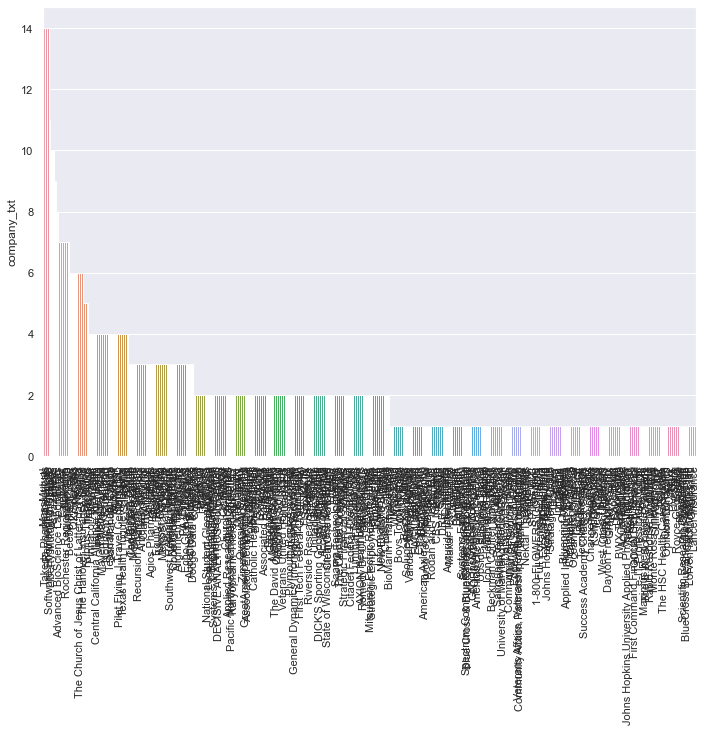

graph for job_state: total = 37


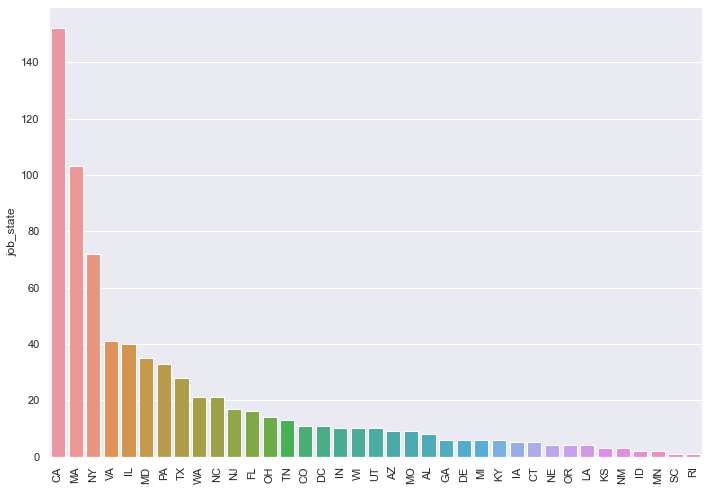

graph for same_state: total = 2


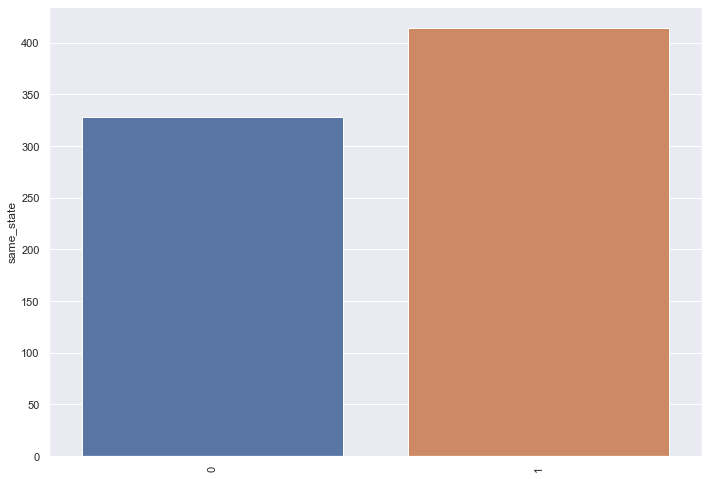

graph for python_yn: total = 2


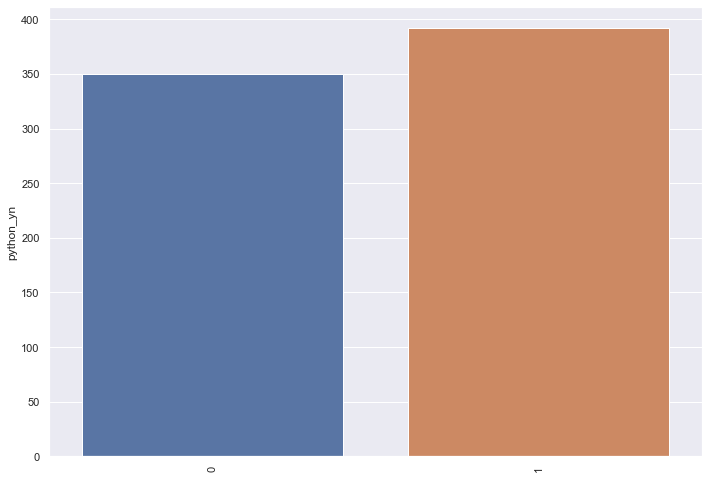

graph for R_yn: total = 2


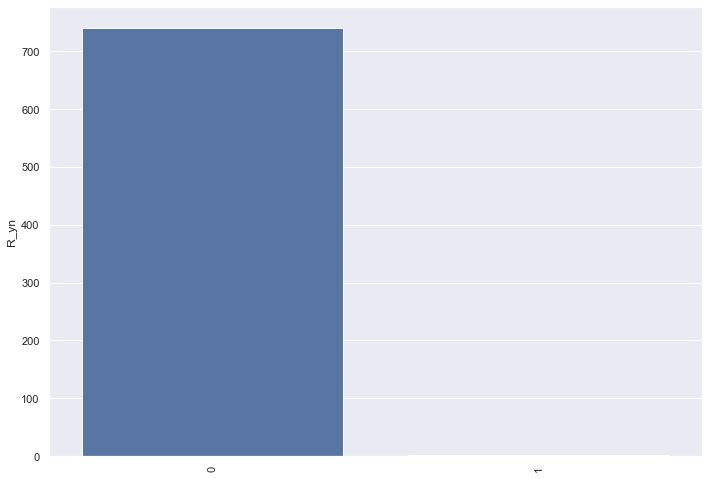

graph for spark: total = 2


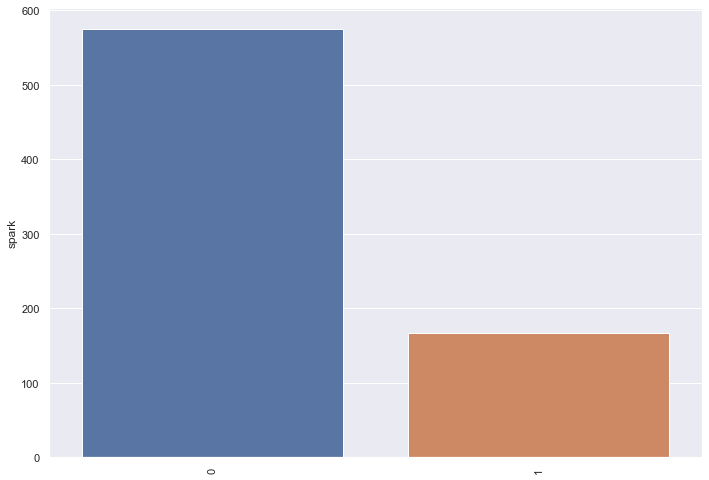

graph for aws: total = 2


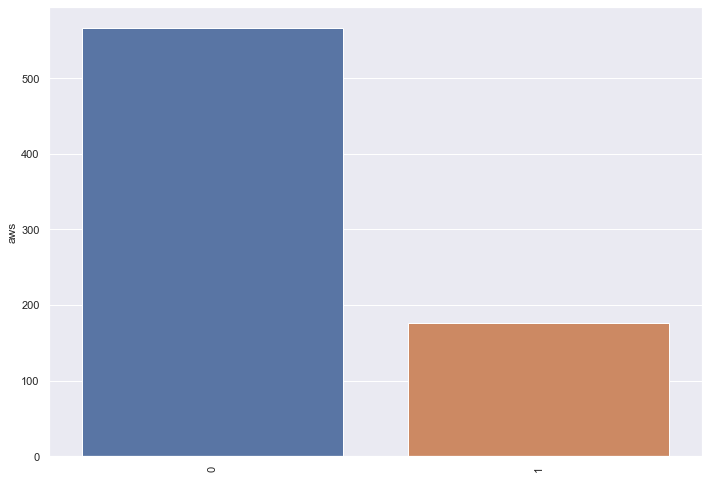

graph for excel: total = 2


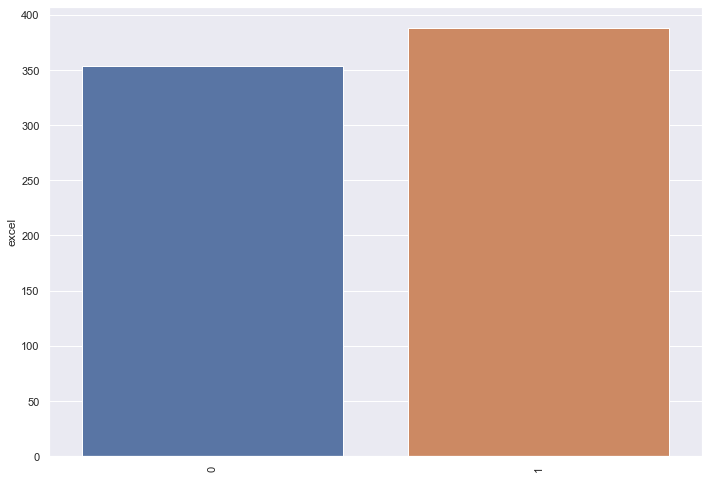

graph for job_simp: total = 7


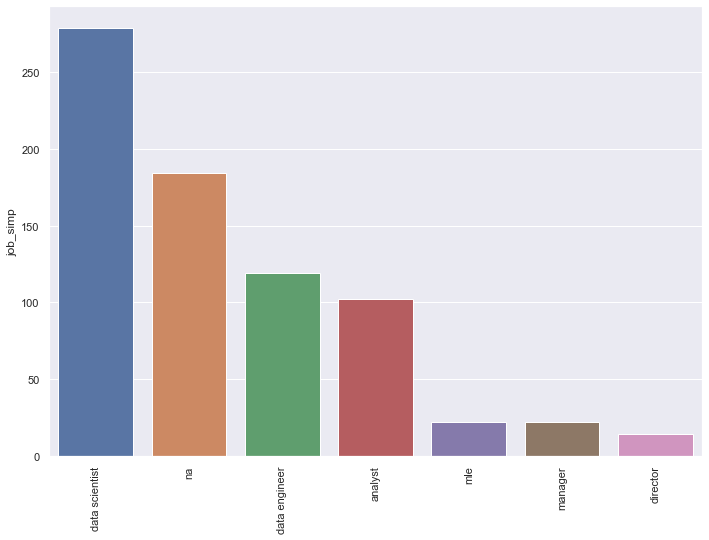

graph for seniority: total = 3


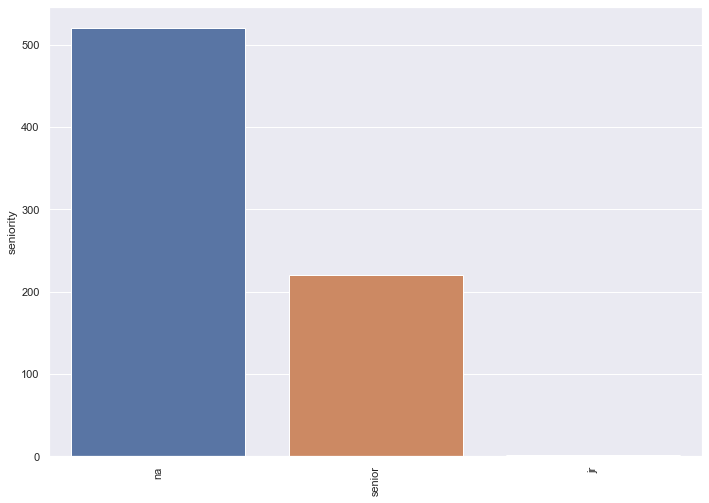

In [94]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print('graph for {} total = {}'.format(i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location total = 20


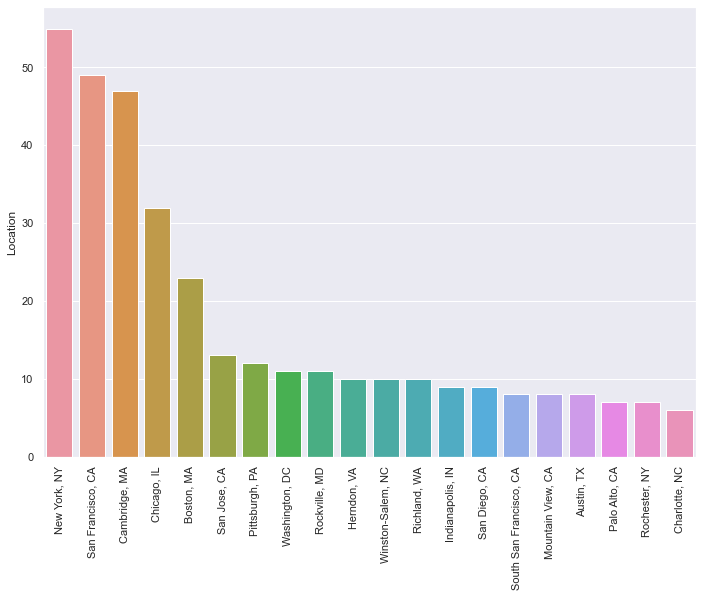

graph for Headquarters total = 20


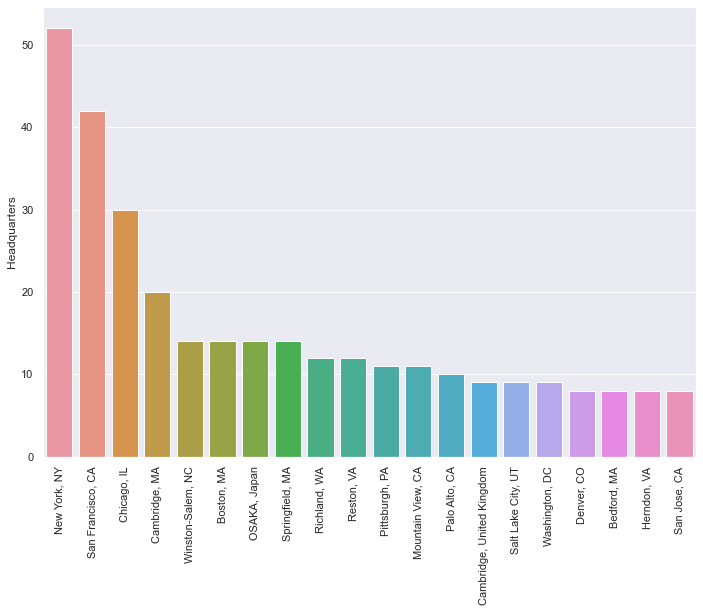

graph for company_txt total = 20


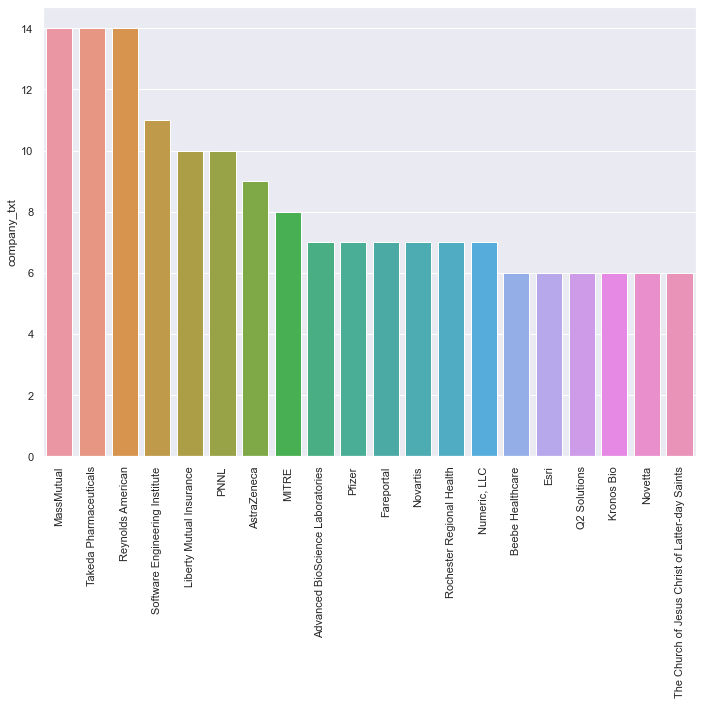

In [96]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print('graph for {} total = {}'.format(i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
E    plt.show()

In [97]:
## get some insights

pd.pivot_table(df, index = 'job_simp',values='avg_salary')

,avg_salary
job_simp,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [98]:
pd.pivot_table(df, index=['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [100]:
pd.set_option('display.max_rows',None)

In [102]:
# avg_salary here, telling how many of each job in each city
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state')

avg_salary
job_state job_simp                  
AL        analyst                  5
          data engineer            1
          na                       2
AZ        analyst                  1
          data engineer            5
          data scientist           1
          na                       2
CA        mle                      5
          manager                  9
          na                      27
          data engineer           25
          analyst                 18
          data scientist          68
CO        analyst                  1
          data engineer            3
          data scientist           3
          mle                      1
          na                       3
CT        data scientist           2
          na                       3
DC        analyst                  2
          data engineer            4
          data scientist           5
DE        na                       6
FL        data engineer            3
          data scientist           7
          analyst                  6
GA        data scientist           3
          na                       3
IA        analyst                  2
          data engineer            3
ID        analyst                  2
IL        na                       6
          analyst                  3
          data engineer            8
          data scientist          15
          director                 6
          mle                      2
IN        na                       4
          data scientist           2
          data engineer            4
KS        mle                      3
KY        data scientist           2
          na                       4
LA        analyst                  1
          data engineer            2
          na                       1
MA        manager                  5
          director                 6
          na                      46
          data engineer           12
          analyst                  4
          data scientist          30
MD        data scientist          13
          na                      16
          analyst                  3
          data engineer            3
MI        data scientist           4
          manager                  2
MN        analyst                  1
          data engineer            1
MO        analyst                  2
          data scientist           3
          manager                  1
          na                       3
NC        data engineer            6
          data scientist           3
          na                      12
NE        na                       4
NJ        na                       1
          manager                  2
          director                 2
          data engineer            2
          data scientist           4
          analyst                  6
NM        data scientist           3
NY        analyst                 14
          data engineer            4
          data scientist          40
          mle                      2
          na                      12
OH        na                       3
          analyst                  4
          data scientist           7
OR        data scientist           3
          data engineer            1
PA        analyst                  8
          data engineer            1
          data scientist           6
          manager                  3
          mle                      7
          na                       8
RI        analyst                  1
SC        na                       1
TN        analyst                  2
          data engineer           10
          data scientist           1
TX        data scientist          13
          na                       7
          data engineer            8
UT        analyst                  4
          data engineer            3
          data scientist           3
VA        analyst                  6
          data engineer           10
          data scientist          18
          mle                 

In [107]:
filt = (df['job_simp'] == 'data scientist') 
pd.pivot_table(df.loc[filt], index = 'job_state', values = 'avg_salary').sort_values(by='avg_salary')

,avg_salary
job_state,
AZ,69.500000
NM,74.333333
GA,81.333333
KY,84.000000
CT,84.000000
IN,84.500000
TN,96.000000
FL,97.357143
OR,98.500000


In [108]:
# rating, industry, sector, revenue, number of comp, hourly, employer provided, python, r, spark, aws, excel, desc_len, Type of onwership

In [109]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 'python_yn', 'R_yn', 'spark', 'aws', 'excel', 'Type of ownership','avg_salary']]

In [114]:
for c in df_pivots.columns:
    print(c)
    print(pd.pivot_table(df_pivots, index = c, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 3.2    105.500000
 4.0    105.340426
 3.5    104.897959
 3.7    104.131148
 4.7    103.983871
 4.3    102.468750
 3.3    101.858974
 4.2    100.442308
 2.2     97.750000
 4.6     97.250000
 3.8     96.811475
 2.1     95.900000
 3.4     93.011364
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 3.6     85.467391
 2.8     83.928571
 2.7     83.250000
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg_salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [117]:
#!pip install wordcloud

In [128]:
#import nltk
#nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\arafa\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [129]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

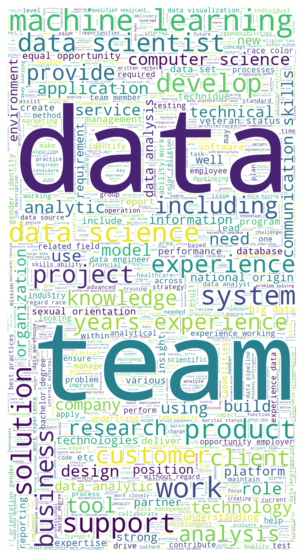

In [130]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

In [131]:
df.to_csv('eda_data.csv', index = False)